In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
df = pd.read_csv("/content/economic_index.csv")

In [25]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [26]:
#dropping unnecessary columns
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [27]:
 df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [29]:
#checking null values
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


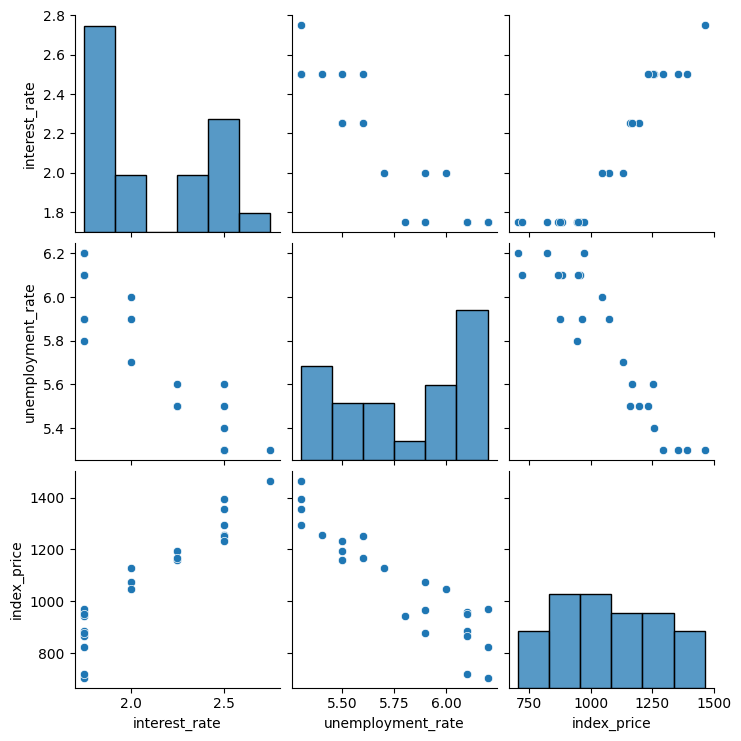

In [30]:
#visualising using seaborn
import seaborn as sns
sns.pairplot(df)

In [32]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

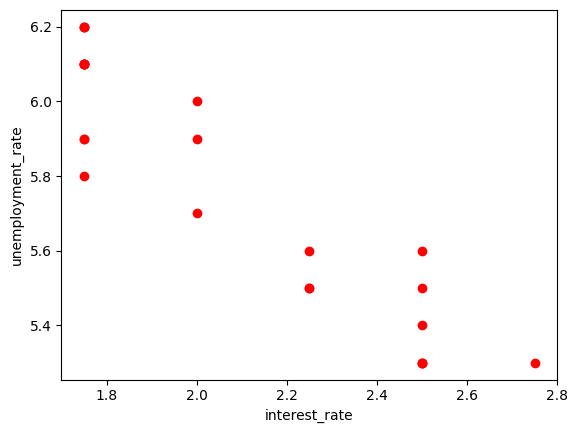

In [36]:
#visualising datapoints more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

Text(0, 0.5, 'idex_price')

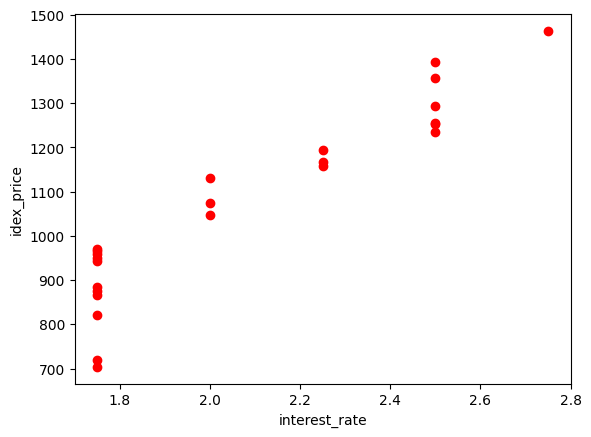

In [38]:
plt.scatter(df['interest_rate'],df['index_price'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('idex_price')

#index_price and interest_rate are positively correlated where as unemployment_rate and interest_rate are negatively correlated

In [39]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [41]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

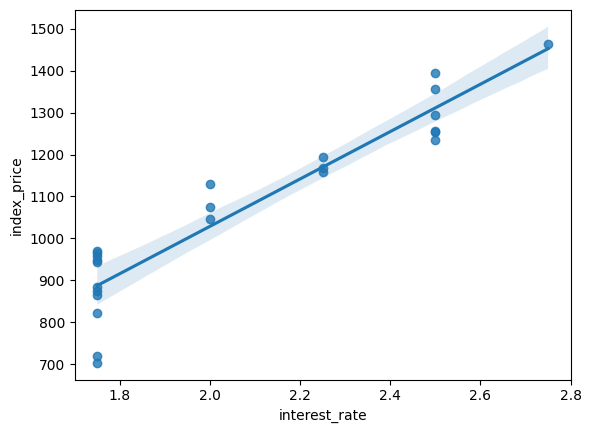

In [52]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])
plt.show()

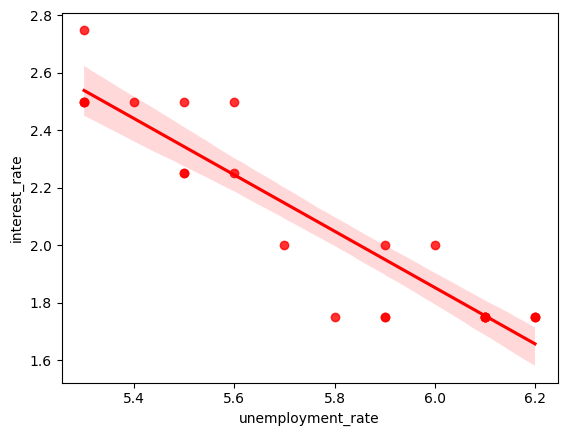

In [57]:
sns.regplot(x=df['unemployment_rate'],y=df['interest_rate'],color='r')
plt.show()

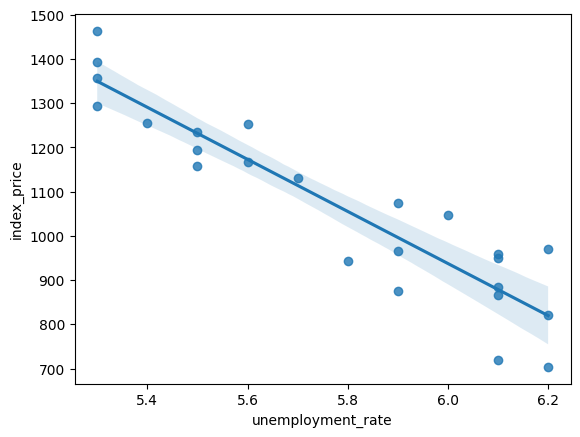

In [58]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'])
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [62]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [63]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [64]:
regression.fit(X_train,Y_train)

LinearRegression()

In [88]:
print("coefficient = ",regression.coef_)
print("Intercept = ",regression.intercept_)

coefficient =  [  88.27275507 -116.25716066]
Intercept =  1053.4444444444443


In [73]:
#croos validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [72]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [74]:
y_pred = regression.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)

In [76]:
print("mean_squared_error : ",mse)
print("mean_absolute_error : ",mae)
print("root_mean_squared_error : ",rmse)

mean_squared_error :  8108.567426306604
mean_absolute_error :  73.80444932337097
root_mean_squared_error :  90.04758423359621


In [79]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)
adjusted_r2 = 1 - (1-score) * (len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print(score)
print(adjusted_r2)

0.7591371539010257
0.5985619231683761


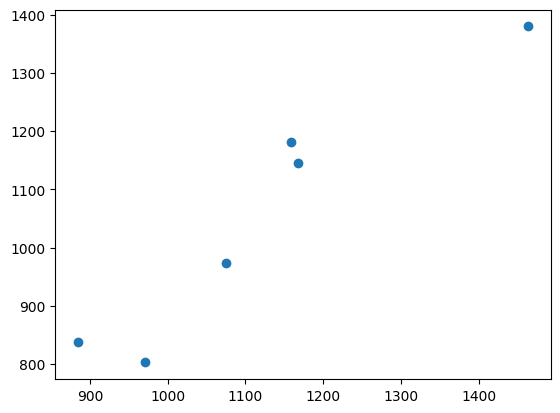

In [81]:
plt.scatter(Y_test,y_pred)

In [83]:
residuals = Y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


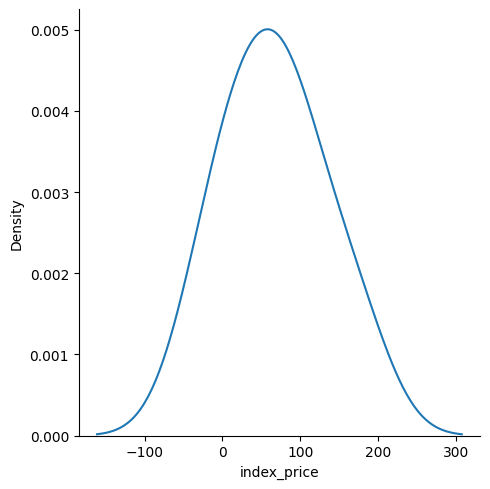

In [84]:
sns.displot(residuals,kind='kde')

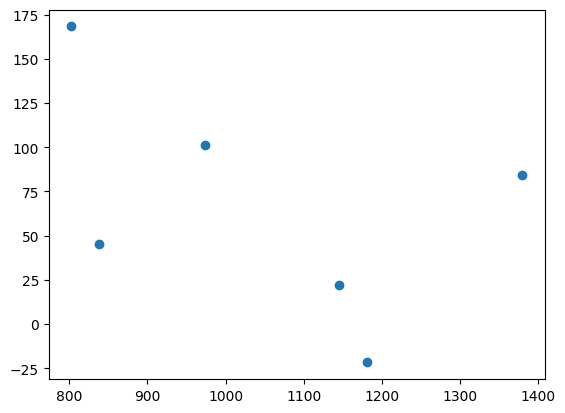

In [87]:
plt.scatter(y_pred,residuals)

# #Uniformly distributed which means no particular pattern

In [89]:
##OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()

In [90]:
model.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 24 May 2025   Prob (F-statistic):                       0.754
Time:                        08:08:03   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""